In [1]:
import pandas as pd
df = pd.read_csv('COVID_Data_Basic.csv')
df.head()

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0


In [67]:
ds = pd.read_excel('countries.xlsx', index_col = "Country")
ds.head()

,geoId,continentExp,popData2019
Country,,,
Afghanistan,AF,Asia,38041757
Albania,AL,Europe,2862427
Algeria,DZ,Africa,43053054
Andorra,AD,Europe,76177
Angola,AO,Africa,31825299


In [3]:
new_df = pd.merge(df, ds, how='inner', left_on='Country', right_index=True)
new_df.head()

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered,geoId,continentExp,popData2019
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0,AF,Asia,38041757
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0,AF,Asia,38041757
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0,AF,Asia,38041757
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0,AF,Asia,38041757
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0,AF,Asia,38041757


In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21743 entries, 0 to 27549
Data columns (total 12 columns):
Unnamed: 0      21743 non-null int64
Country         21743 non-null object
Date            21743 non-null object
Confirmed       21743 non-null int64
Death           21743 non-null int64
Recovered       21743 non-null int64
newConfirmed    21743 non-null int64
newDeath        21743 non-null int64
newRecovered    21743 non-null int64
geoId           21594 non-null object
continentExp    21743 non-null object
popData2019     21743 non-null object
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


In [5]:
df1 = new_df.loc[(new_df['Date'] == '2020-06-18') & (new_df['continentExp']=='Europe')] 
#df.loc[df['Country'] == 'Russia']
df2 = df1.sort_values('Confirmed',ascending = False)
df3 = df2.head(12)
df3

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered,geoId,continentExp,popData2019
23272,21009,Russia,2020-06-18,560321,7650,313409,7772,182,9609,RU,Europe,145872260
24910,23691,Spain,2020-06-18,245268,27136,150376,585,0,0,ES,Europe,46937060
18267,12814,Italy,2020-06-18,238159,34514,180544,331,66,1089,IT,Europe,60359546
16174,93871,France,2020-06-18,195272,29606,74011,467,28,220,FR,Europe,67012883
16538,99831,Germany,2020-06-18,189817,8875,173847,1213,24,248,DE,Europe,83019213
11988,25332,Belgium,2020-06-18,60348,9683,16724,104,8,40,BE,Europe,11455519
11897,23842,Belarus,2020-06-18,56657,331,34023,625,7,1288,BY,Europe,9452409
25274,24287,Sweden,2020-06-18,56043,5053,0,1481,12,0,SE,Europe,10230185
21634,18327,Netherlands,2020-06-18,49527,6097,186,115,4,0,NL,Europe,17282163
22999,20562,Portugal,2020-06-18,38089,1524,24010,417,1,430,PT,Europe,10276617


In [6]:
cc = list(df3['Country'])
cc

['Russia',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'Belgium',
 'Belarus',
 'Sweden',
 'Netherlands',
 'Portugal',
 'Ukraine',
 'Switzerland']

In [7]:
df5 = new_df[new_df['Country'].isin(cc)]
df5

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered,geoId,continentExp,popData2019
966,967,Belarus,2019-12-31,0,0,0,0,0,0,BY,Europe,9452409
967,968,Belarus,2020-01-01,0,0,0,0,0,0,BY,Europe,9452409
968,969,Belarus,2020-01-02,0,0,0,0,0,0,BY,Europe,9452409
969,970,Belarus,2020-01-03,0,0,0,0,0,0,BY,Europe,9452409
970,971,Belarus,2020-01-04,0,0,0,0,0,0,BY,Europe,9452409
...,...,...,...,...,...,...,...,...,...,...,...,...
26453,26220,Ukraine,2020-06-14,31851,899,14596,674,9,107,UA,Europe,43993643
26454,26221,Ukraine,2020-06-15,32536,911,14771,685,12,175,UA,Europe,43993643
26455,26222,Ukraine,2020-06-16,33209,922,15054,673,11,283,UA,Europe,43993643
26456,26223,Ukraine,2020-06-17,33986,953,15485,777,31,431,UA,Europe,43993643


In [8]:
df5['popData2019'].astype(str).astype(int)
df5.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 966 to 26457
Data columns (total 12 columns):
Unnamed: 0      2008 non-null int64
Country         2008 non-null object
Date            2008 non-null object
Confirmed       2008 non-null int64
Death           2008 non-null int64
Recovered       2008 non-null int64
newConfirmed    2008 non-null int64
newDeath        2008 non-null int64
newRecovered    2008 non-null int64
geoId           2008 non-null object
continentExp    2008 non-null object
popData2019     2008 non-null object
dtypes: int64(7), object(5)
memory usage: 203.9+ KB


In [11]:
df5['population'] = pd.to_numeric(df5['popData2019'])
df5['population'].astype(int)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 966 to 26457
Data columns (total 13 columns):
Unnamed: 0      2008 non-null int64
Country         2008 non-null object
Date            2008 non-null object
Confirmed       2008 non-null int64
Death           2008 non-null int64
Recovered       2008 non-null int64
newConfirmed    2008 non-null int64
newDeath        2008 non-null int64
newRecovered    2008 non-null int64
geoId           2008 non-null object
continentExp    2008 non-null object
popData2019     2008 non-null object
population      2008 non-null int64
dtypes: int64(8), object(5)
memory usage: 219.6+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 966 to 26457
Data columns (total 13 columns):
Unnamed: 0      2008 non-null int64
Country         2008 non-null object
Date            2008 non-null object
Confirmed       2008 non-null int64
Death           2008 non-null int64
Recovered       2008 non-null int64
newConfirmed    2008 non-null int64
newDeath        2008 non-null int64
newRecovered    2008 non-null int64
geoId           2008 non-null object
continentExp    2008 non-null object
popData2019     2008 non-null object
population      2008 non-null int64
dtypes: int64(8), object(5)
memory usage: 219.6+ KB


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

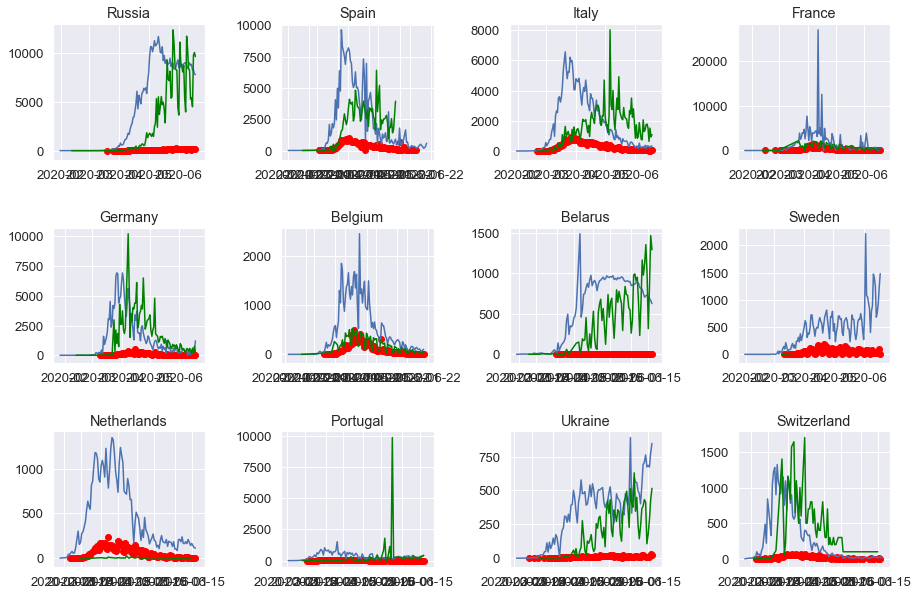

In [234]:
fig, ax = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.5, hspace = 0.5)

combi = [(0,0),(0,1),(0,2),(0,3), (1,0),(1,1),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3)]

for i in range(12):
    y = df5.loc[(df5['Country']==cc[i]) & (df5['newConfirmed'] > 0),('newConfirmed')]
    x = df5.loc[(df5['Country']==cc[i]) & (df5['newConfirmed'] > 0),('Date')]
    y1 = df5.loc[(df5['Country']==cc[i]) & (df5['newDeath'] > 0),('newDeath')]
    x1 = df5.loc[(df5['Country']==cc[i]) & (df5['newDeath'] > 0),('Date')]
    y2 = df5.loc[(df5['Country']==cc[i]) & (df5['newRecovered'] > 0),('newRecovered')]
    x2 = df5.loc[(df5['Country']==cc[i]) & (df5['newRecovered'] > 0),('Date')]
    ax[combi[i]].plot(x, y)
    ax[combi[i]].scatter(x1, y1, color = 'red')
    ax[combi[i]].plot(x2, y2, color = 'green')
    ax[combi[i]].set_title(cc[i])


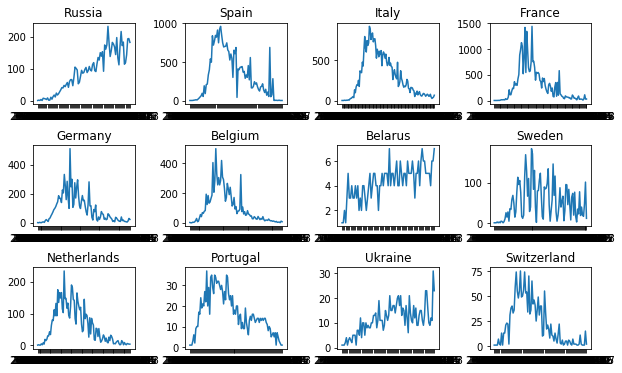

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(10, 6)
fig.subplots_adjust(wspace=0.5, hspace = 0.5)

combi = [(0,0),(0,1),(0,2),(0,3), (1,0),(1,1),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3)]

for i in range(12):
    y = df5.loc[(df5['Country']==cc[i]) & (df5['newDeath'] > 0),('newDeath')]
    x = df5.loc[(df5['Country']==cc[i]) & (df5['newDeath'] > 0),('Date')]
    ax[combi[i]].plot(x, y)
    ax[combi[i]].set_title(cc[i])  


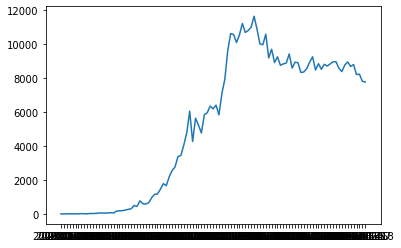

In [34]:
plt.plot(x,y)

In [46]:
import datetime as dt
df5['week'] = df5['Date'].dt.week
df5.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [47]:
df = df5
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 966 to 26457
Data columns (total 13 columns):
Unnamed: 0      2008 non-null int64
Country         2008 non-null object
Date            2008 non-null object
Confirmed       2008 non-null int64
Death           2008 non-null int64
Recovered       2008 non-null int64
newConfirmed    2008 non-null int64
newDeath        2008 non-null int64
newRecovered    2008 non-null int64
geoId           2008 non-null object
continentExp    2008 non-null object
popData2019     2008 non-null object
population      2008 non-null int64
dtypes: int64(8), object(5)
memory usage: 219.6+ KB


In [48]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 966 to 26457
Data columns (total 13 columns):
Unnamed: 0      2008 non-null int64
Country         2008 non-null object
Date            2008 non-null datetime64[ns]
Confirmed       2008 non-null int64
Death           2008 non-null int64
Recovered       2008 non-null int64
newConfirmed    2008 non-null int64
newDeath        2008 non-null int64
newRecovered    2008 non-null int64
geoId           2008 non-null object
continentExp    2008 non-null object
popData2019     2008 non-null object
population      2008 non-null int64
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 219.6+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df['week'] = df['Date'].dt.week
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered,geoId,continentExp,popData2019,population,week
966,967,Belarus,2019-12-31,0,0,0,0,0,0,BY,Europe,9452409,9452409,1
967,968,Belarus,2020-01-01,0,0,0,0,0,0,BY,Europe,9452409,9452409,1
968,969,Belarus,2020-01-02,0,0,0,0,0,0,BY,Europe,9452409,9452409,1
969,970,Belarus,2020-01-03,0,0,0,0,0,0,BY,Europe,9452409,9452409,1
970,971,Belarus,2020-01-04,0,0,0,0,0,0,BY,Europe,9452409,9452409,1


In [65]:
df.describe()

,Unnamed: 0,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered,population,week
count,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2.008000e+03,2008.000000
mean,32299.959163,47945.998506,4152.970618,21383.894422,874.269920,66.434761,503.999502,4.321445e+07,13.092629
std,54146.723615,84426.867929,8330.705520,46943.841914,1985.928405,166.387847,1345.539304,4.029190e+07,6.956508
min,967.000000,0.000000,0.000000,0.000000,-10034.000000,-1918.000000,-30.000000,8.544527e+06,1.000000
25%,7872.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.023018e+07,7.000000
50%,12811.500000,5839.000000,98.000000,16.500000,167.000000,4.000000,0.000000,3.063790e+07,13.000000
75%,24348.250000,45935.500000,3709.250000,15416.250000,712.750000,49.250000,300.000000,6.701288e+07,19.000000
max,253210.000000,560321.000000,34514.000000,313409.000000,26849.000000,1438.000000,12331.000000,1.458723e+08,25.000000


In [66]:
df.to_csv('covid_week.csv')

In [64]:
gdf = df.groupby(['Country','week'])['newConfirmed'].sum()
gdf

Country  week
Belarus  1          0
         2          0
         3          0
         4          0
         5          0
                 ... 
Ukraine  21      2695
         22      2686
         23      3927
         24      4252
         25      2982
Name: newConfirmed, Length: 294, dtype: int64

In [236]:
df_c = pd.read_excel('newConfirmed.xlsx', index_col = "week")
df_d = pd.read_excel('newDeath.xlsx', index_col = "week")
СС = df_c.corr()

In [237]:
df_d.corr()

,Belarus,Belgium,France,Germany,Italy,Netherlands,Portugal,Russia,Spain,Sweden,Switzerland,Ukraine
Belarus,1.000000,0.305017,0.195428,0.369845,0.016342,0.223333,0.506233,0.929954,0.040502,0.764085,0.081945,0.985061
Belgium,0.305017,1.000000,0.936747,0.972847,0.668819,0.917130,0.909753,-0.017891,0.727232,0.795423,0.860956,0.294631
France,0.195428,0.936747,1.000000,0.927363,0.795482,0.964295,0.898624,-0.105042,0.870384,0.675241,0.969451,0.199479
Germany,0.369845,0.972847,0.927363,1.000000,0.715922,0.956302,0.960011,0.051296,0.775499,0.851277,0.878112,0.366175
Italy,0.016342,0.668819,0.795482,0.715922,1.000000,0.861075,0.732185,-0.189983,0.947305,0.438435,0.881575,0.043297
Netherlands,0.223333,0.917130,0.964295,0.956302,0.861075,1.000000,0.938951,-0.072308,0.920233,0.721178,0.968895,0.230451
Portugal,0.506233,0.909753,0.898624,0.960011,0.732185,0.938951,1.000000,0.236038,0.805213,0.877205,0.861660,0.498533
Russia,0.929954,-0.017891,-0.105042,0.051296,-0.189983,-0.072308,0.236038,1.000000,-0.186897,0.505066,-0.190415,0.894543
Spain,0.040502,0.727232,0.870384,0.775499,0.947305,0.920233,0.805213,-0.186897,1.000000,0.476489,0.947421,0.064867
Sweden,0.764085,0.795423,0.675241,0.851277,0.438435,0.721178,0.877205,0.505066,0.476489,1.000000,0.564429,0.768918


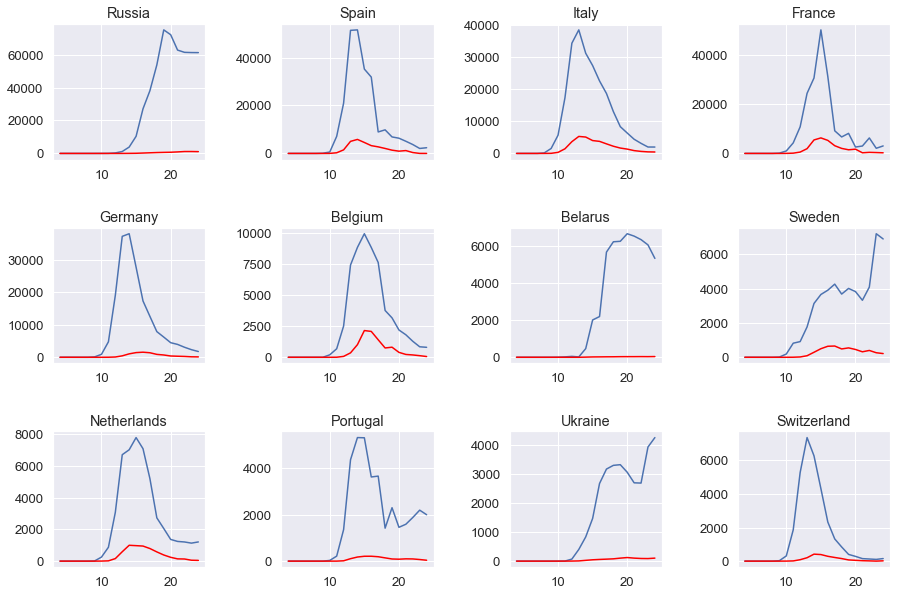

In [238]:
fig, ax = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.5, hspace = 0.5)

combi = [(0,0),(0,1),(0,2),(0,3), (1,0),(1,1),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3)]

for i in range(12):
    ax[combi[i]].plot(df_c[cc[i]])
    ax[combi[i]].plot(df_d[cc[i]], color = 'red')
    ax[combi[i]].set_title(cc[i])

In [239]:
import numpy as np

In [1]:
for i in cc:
    print(f'{i}\t -\t {np.corrcoef(df_c[i],df_d[i])[0,1]}')
    #print(i)

NameError: name 'cc' is not defined

In [241]:
CorC = df_c.corr()
CorD = df_d.corr()

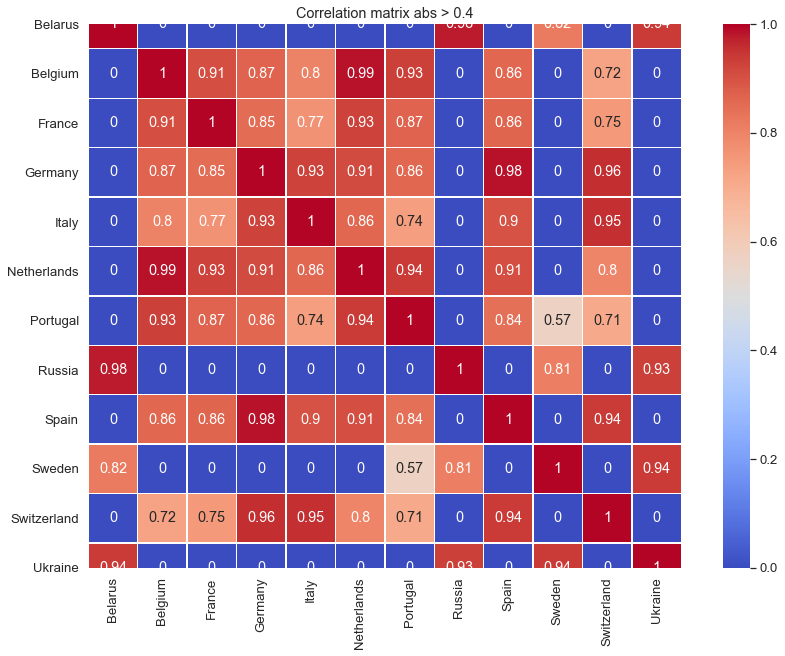

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
CorC[np.abs(CorC) < 0.4] = 0

plt.figure(figsize = (15,10))
sns.set(font_scale=1.2)
sns.heatmap(CorC, annot=True, linewidths=0.4, square=True, cmap='coolwarm')
plt.title('Correlation matrix abs > 0.4')
plt.show()

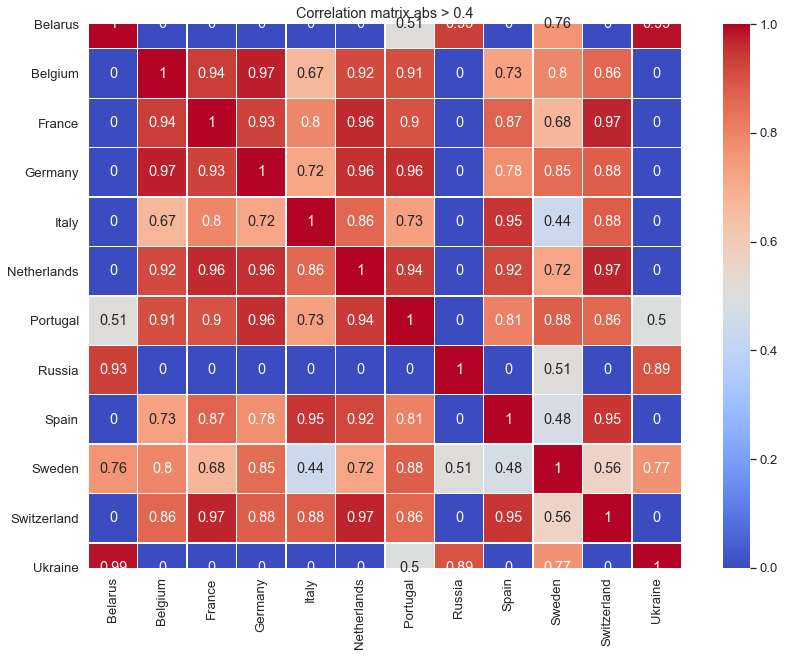

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
CorD[np.abs(CorD) < 0.4] = 0

plt.figure(figsize = (15,10))
sns.set(font_scale=1.2)
sns.heatmap(CorD, annot=True, linewidths=0.4, square=True, cmap='coolwarm')
plt.title('Correlation matrix abs > 0.4')
plt.show()

In [244]:
df_d.describe()

,Belarus,Belgium,France,Germany,Italy,Netherlands,Portugal,Russia,Spain,Sweden,Switzerland,Ukraine
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,14.666667,459.761905,1400.476190,419.095238,1635.476190,289.428571,72.238095,330.380952,1387.095238,232.095238,92.285714,42.809524
std,15.771282,677.342742,2008.422506,534.146226,1789.857218,366.684002,76.063069,435.690541,1853.684356,241.148482,133.282085,45.619753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,128.000000,353.000000,145.000000,877.000000,134.000000,69.000000,37.000000,368.000000,215.000000,17.000000,27.000000
75%,32.000000,750.000000,1935.000000,703.000000,2984.000000,581.000000,105.000000,635.000000,2074.000000,454.000000,152.000000,88.000000
max,39.000000,2153.000000,6319.000000,1564.000000,5303.000000,999.000000,210.000000,1158.000000,5838.000000,654.000000,415.000000,123.000000


In [123]:
d1 = pd.read_csv('COVID_Data_Basic.csv')
d1.head()

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0


In [136]:
d2 = d1.groupby('Date')['newConfirmed'].sum()
d3 = d2[d2 > 0]

In [138]:
d3

Date
2020-01-03        17
2020-01-05        15
2020-01-13         1
2020-01-15         1
2020-01-17         5
               ...  
2020-06-14    133545
2020-06-15    122035
2020-06-16    139479
2020-06-17    176010
2020-06-18    139026
Name: newConfirmed, Length: 158, dtype: int64

(array([65.,  5.,  3.,  7., 35., 21.,  8., 13.,  0.,  1.]),
 array([1.000000e+00, 1.760190e+04, 3.520280e+04, 5.280370e+04,
        7.040460e+04, 8.800550e+04, 1.056064e+05, 1.232073e+05,
        1.408082e+05, 1.584091e+05, 1.760100e+05]),
 <a list of 10 Patch objects>)

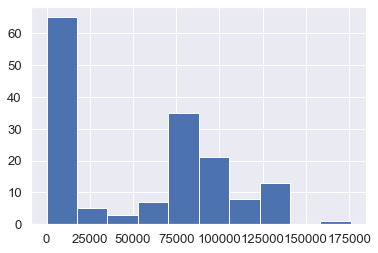

In [139]:
plt.hist(d3)

In [143]:
df_d['total'] = 0
df_d['total'] = df_d.sum(axis=1)
df_d

,Belarus,Belgium,France,Germany,Italy,Netherlands,Portugal,Russia,Spain,Sweden,Switzerland,Ukraine,total
week,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,3,0,0,0,0,0,0,0,3
9,0,0,1,0,31,0,0,0,0,0,0,0,32
10,0,0,17,0,332,3,0,0,17,0,2,0,371
11,0,4,108,11,1443,17,0,0,272,3,12,1,1871
12,0,71,549,83,3667,160,14,1,1483,18,84,2,6132


In [168]:
means = dict(df5.groupby('Country')['newDeath'].mean())
mean_df = df5['newDeath'].mean()
means, mean_df

({'Belarus': 1.935672514619883,
  'Belgium': 56.62573099415204,
  'France': 173.1345029239766,
  'Germany': 51.900584795321635,
  'Italy': 201.83625730994152,
  'Netherlands': 35.654970760233915,
  'Portugal': 10.228187919463087,
  'Russia': 44.73684210526316,
  'Spain': 158.69005847953215,
  'Sweden': 29.549707602339183,
  'Switzerland': 11.43859649122807,
  'Ukraine': 6.550335570469799},
 66.4347609561753)

In [156]:
counts = dict(df5.groupby('Country')['newDeath'].count())
counts

{'Belarus': 171,
 'Belgium': 171,
 'France': 171,
 'Germany': 171,
 'Italy': 171,
 'Netherlands': 171,
 'Portugal': 149,
 'Russia': 171,
 'Spain': 171,
 'Sweden': 171,
 'Switzerland': 171,
 'Ukraine': 149}

Для проверки гипотез в дисперсионном анализе также используется __F-критерий Фишера__. Используемая статистика представляет из себя отношение дисперсии между уровнями к дисперсии внутри уровней.

Пусть в каждой выборке $Y_i$ содержится $n_i$ элементов. Обозначим через $Y$ объединение всех выборок, т.е. выборку размера $n = n_1 + \dots + n_k$.

Рассмотрим две суммы квадратов:
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$
где $y_{ij}$ — $j$-й элемент $i$-й выборки.

Первая сумма — отклонения между группами («b» от слова Between — между), вторая — отклонения внутри групп («w» от слова Within — внутри).

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

Итак, статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Как и ранее, критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

In [185]:
SS_b = 0
SS_w = 0
for c in cc:
    SS_b += counts[c]*(means[c]-mean_df)**2
    SS_w += (np.array((df5.loc[df5['Country'] == c,('newDeath')] - means[c]))**2).sum()
SS_b, SS_w

(9298606.56181352, 46265018.89187174)

In [193]:
k = len(cc)
n = sum(counts.values())
k1 = k - 1
k2 = n - k
sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(845327.8692557745, 23178.867180296464)

In [194]:
F = sigma2_b / sigma2_w
F

36.469766303952845

In [195]:
from scipy import stats
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

1.7934357697622718

In [204]:
cmeans = dict(df5.groupby('Country')['newConfirmed'].mean())
cmean_df = df5['newConfirmed'].mean()
cmeans, cmean_df

({'Belarus': 331.32748538011697,
  'Belgium': 352.9122807017544,
  'France': 1141.9415204678362,
  'Germany': 1110.0409356725147,
  'Italy': 1392.7426900584796,
  'Netherlands': 289.63157894736844,
  'Portugal': 255.63087248322148,
  'Russia': 3276.7309941520466,
  'Spain': 1434.3157894736842,
  'Sweden': 327.7368421052632,
  'Switzerland': 182.4561403508772,
  'Ukraine': 233.7785234899329},
 874.2699203187251)

In [206]:
ccounts = dict(df5.groupby('Country')['newConfirmed'].count())
ccounts

{'Belarus': 171,
 'Belgium': 171,
 'France': 171,
 'Germany': 171,
 'Italy': 171,
 'Netherlands': 171,
 'Portugal': 149,
 'Russia': 171,
 'Spain': 171,
 'Sweden': 171,
 'Switzerland': 171,
 'Ukraine': 149}

In [229]:
ccc = ['Spain','Italy']

In [230]:
SS_b = 0
SS_w = 0
for c in ccc:
    SS_b += ccounts[c]*(cmeans[c]-cmean_df)**2
    SS_w += (np.array((df5.loc[df5['Country'] == c,('newConfirmed')] - cmeans[c]))**2).sum()
SS_b, SS_w


(99601581.43677399, 1616715457.625731)

In [231]:
k = len(ccc)
n = 0
for c in ccc:
    n += ccounts[c]
k1 = k - 1
k2 = n - k
sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(99601581.43677399, 4755045.463605091)

In [232]:
F = sigma2_b / sigma2_w
F

20.946504549561116

In [233]:
from scipy import stats
alpha = 0.01

t = stats.f.ppf(1 - alpha, k1, k2)
t

6.709998463549208